<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data_multi_delta_(0)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.693636,0.511569,109.205205,108.449663,0.755542
1,0.0,1.0,20.018509,-1.014637,29.003872,30.272740,-1.268869
2,0.0,2.0,73.778724,-1.226075,82.552649,83.692523,-1.139874
3,0.0,3.0,85.881738,-1.640907,94.240831,95.718896,-1.478064
4,0.0,4.0,20.188159,-0.259881,29.928278,30.441317,-0.513038
...,...,...,...,...,...,...,...
119995,999.0,115.0,76.836829,0.541421,87.378249,86.675189,0.703060
119996,999.0,116.0,73.469767,-0.042460,83.427307,83.336825,0.090482
119997,999.0,117.0,41.500622,0.270365,51.770986,51.640147,0.130839
119998,999.0,118.0,78.116409,-0.250269,87.866140,87.943864,-0.077724


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.693636  0.511569  109.205205  108.449663  0.755542
      1.0    20.018509 -1.014637   29.003872   30.272740 -1.268869
      2.0    73.778724 -1.226075   82.552649   83.692523 -1.139874
      3.0    85.881738 -1.640907   94.240831   95.718896 -1.478064
      4.0    20.188159 -0.259881   29.928278   30.441317 -0.513038
...                ...       ...         ...         ...       ...
999.0 115.0  76.836829  0.541421   87.378249   86.675189  0.703060
      116.0  73.469767 -0.042460   83.427307   83.336825  0.090482
      117.0  41.500622  0.270365   51.770986   51.640147  0.130839
      118.0  78.116409 -0.250269   87.866140   87.943864 -0.077724
      119.0  82.264757 -0.702011   91.562746   92.056856 -0.494110

[120000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.693636  0.511569  109.205205  108.449663  0.755542
      1.0    20.018509 -1.014637   29.003872   30.272740 -1.268869
      2.0    73.778724 -1.226075   82.552649   83.692523 -1.139874
      3.0    85.881738 -1.640907   94.240831   95.718896 -1.478064
      4.0    20.188159 -0.259881   29.928278   30.441317 -0.513038
...                ...       ...         ...         ...       ...
999.0 115.0  76.836829  0.541421   87.378249   86.675189  0.703060
      116.0  73.469767 -0.042460   83.427307   83.336825  0.090482
      117.0  41.500622  0.270365   51.770986   51.640147  0.130839
      118.0  78.116409 -0.250269   87.866140   87.943864 -0.077724
      119.0  82.264757 -0.702011   91.562746   92.056856 -0.494110

[120000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,98.693636,0.511569,109.205205,108.449663,0.755542
1,0.0,1.0,20.018509,-1.014637,29.003872,30.272740,-1.268869
2,0.0,2.0,73.778724,-1.226075,82.552649,83.692523,-1.139874
3,0.0,3.0,85.881738,-1.640907,94.240831,95.718896,-1.478064
4,0.0,4.0,20.188159,-0.259881,29.928278,30.441317,-0.513038
...,...,...,...,...,...,...,...
119995,999.0,115.0,76.836829,0.541421,87.378249,86.675189,0.703060
119996,999.0,116.0,73.469767,-0.042460,83.427307,83.336825,0.090482
119997,999.0,117.0,41.500622,0.270365,51.770986,51.640147,0.130839
119998,999.0,118.0,78.116409,-0.250269,87.866140,87.943864,-0.077724


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    98.693636  0.511569  109.205205  108.449663  0.755542
      1.0    20.018509 -1.014637   29.003872   30.272740 -1.268869
      2.0    73.778724 -1.226075   82.552649   83.692523 -1.139874
      3.0    85.881738 -1.640907   94.240831   95.718896 -1.478064
      4.0    20.188159 -0.259881   29.928278   30.441317 -0.513038
...                ...       ...         ...         ...       ...
999.0 115.0  76.836829  0.541421   87.378249   86.675189  0.703060
      116.0  73.469767 -0.042460   83.427307   83.336825  0.090482
      117.0  41.500622  0.270365   51.770986   51.640147  0.130839
      118.0  78.116409 -0.250269   87.866140   87.943864 -0.077724
      119.0  82.264757 -0.702011   91.562746   92.056856 -0.494110

[120000 rows x 5 columns]

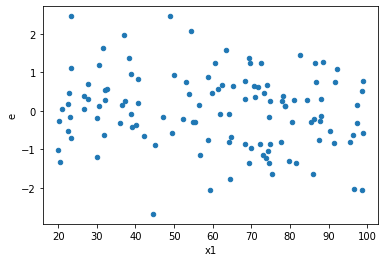

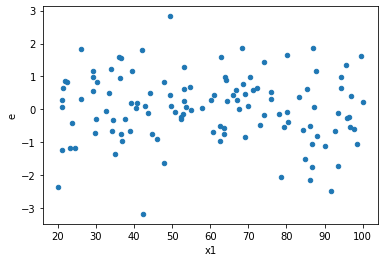

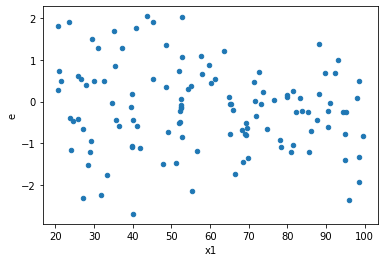

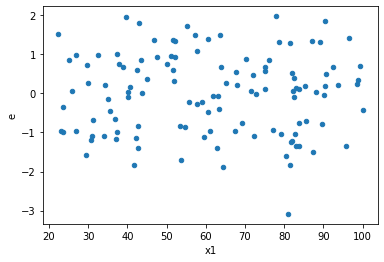

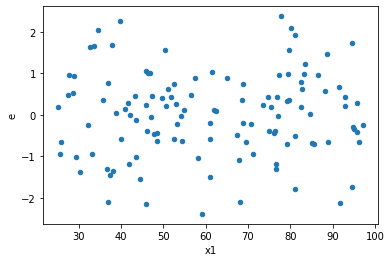

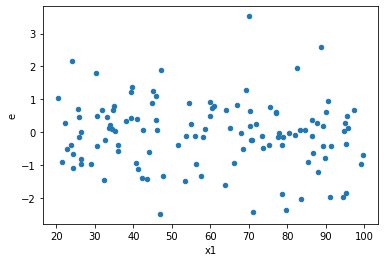

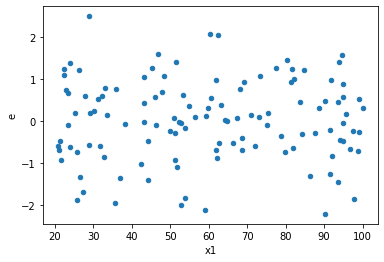

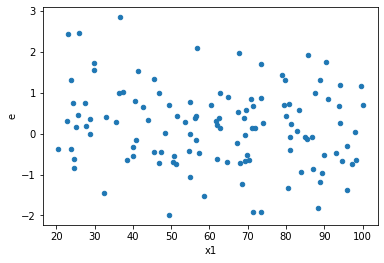

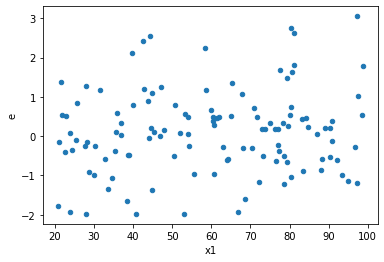

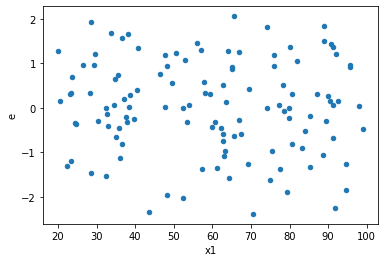

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,61.0,57.0,58.90815082405642,60.92947865204641,0.965707390558302,1.0689382219657266,1.1068965945758622,0.7002965549092377,0.6498517225453811,0.35014827745461885,Reject001=1 : Homoscedasticity
5.0,58.0,60.0,50.908723791582105,68.77467601167342,0.8777366170962432,1.146244600194557,1.305909515301527,0.3071102582337577,0.8464448708831211,0.15355512911687885,Reject001=1 : Homoscedasticity
7.0,65.0,53.0,55.25927212193541,50.47491189680601,0.8501426480297756,0.9523568282416229,1.1202317992736055,0.6729500995053848,0.6635249502473076,0.3364750497526924,Reject001=1 : Homoscedasticity
8.0,65.0,53.0,70.07719229153895,60.20118344472124,1.0781106506390608,1.1358713857494573,1.0535758876662227,0.849722498070566,0.575138750964717,0.424861249035283,Reject001=1 : Homoscedasticity
9.0,51.0,67.0,52.10702362361079,75.6078433621615,1.021706345560996,1.128475274062112,1.1045006023159145,0.6970782178601072,0.6514608910699464,0.3485391089300536,Reject001=1 : Homoscedasticity
10.0,61.0,57.0,50.135179973270034,60.93475215595804,0.8218881962831153,1.0690307395782113,1.3007009279519608,0.3178015701559962,0.8410992149220019,0.1589007850779981,Reject001=1 : Homoscedasticity
13.0,49.0,69.0,34.10188420244634,59.502647948702474,0.6959568204580886,0.8623572166478619,1.2390958624131971,0.40819364096152255,0.7959031795192387,0.20409682048076128,Reject001=1 : Homoscedasticity
17.0,54.0,64.0,47.97171164032893,65.60645232272557,0.8883650303764616,1.025100817542587,1.1539184710008015,0.5797156170541993,0.7101421914729004,0.28985780852709964,Reject001=1 : Homoscedasticity
20.0,44.0,74.0,39.123025667833254,68.6873809266718,0.8891596742689376,0.9282078503604299,1.0439158198707081,0.8555020204685517,0.5722489897657241,0.42775101023427586,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,49.0,69.0,47.474470671272044,62.12354592926735,0.968866748393307,0.9003412453517008,0.9292725205450145,0.7941784743358039,Reject001=1 : Homoscedasticity
1.0,61.0,57.0,58.90815082405642,60.92947865204641,0.965707390558302,1.0689382219657266,1.1068965945758622,0.7002965549092377,Reject001=1 : Homoscedasticity
2.0,62.0,56.0,83.08506680579183,33.53806992014132,1.3400817226740618,0.5988941057168092,0.4469086441398125,0.002207597346972228,Reject001=0 : Heteroscedasticity
3.0,62.0,56.0,65.65262398431172,55.15138181447582,1.0589132900695437,0.9848461038299253,0.930053587074392,0.7783085926691571,Reject001=1 : Homoscedasticity
4.0,64.0,54.0,66.12093138577035,55.301855050042256,1.0331395529026617,1.0241084268526344,0.9912585613195682,0.9674072503177512,Reject001=1 : Homoscedasticity
5.0,58.0,60.0,50.908723791582105,68.77467601167342,0.8777366170962432,1.146244600194557,1.305909515301527,0.3071102582337577,Reject001=1 : Homoscedasticity
6.0,62.0,56.0,65.51088199553519,43.324430266908436,1.056627128960245,0.7736505404805077,0.7321887913684412,0.23179998031732568,Reject001=1 : Homoscedasticity
7.0,65.0,53.0,55.25927212193541,50.47491189680601,0.8501426480297756,0.9523568282416229,1.1202317992736055,0.6729500995053848,Reject001=1 : Homoscedasticity
8.0,65.0,53.0,70.07719229153895,60.20118344472124,1.0781106506390608,1.1358713857494573,1.0535758876662227,0.849722498070566,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      992
Reject001=0 : Heteroscedasticity      8
Name: Result_test, dtype: int64